In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import cov


In [ ]:
df=pd.read_csv('/content/swedan linear - slr06.csv')
df

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [ ]:
covariance = cov(df['X'], df['Y'])
print(covariance)

[[ 545.31336406 1861.60360983]
 [1861.60360983 7626.10144905]]


the above covariance show positive and greater than 0, it means they are positively co related and going in the same direction.


In [ ]:
x = df.iloc[:, :-1].values #get a copy of dataset exclude last column
y = df.iloc[:, 1].values #get array of dataset in column 1st

In [ ]:
print(x)

[[108]
 [ 19]
 [ 13]
 [124]
 [ 40]
 [ 57]
 [ 23]
 [ 14]
 [ 45]
 [ 10]
 [  5]
 [ 48]
 [ 11]
 [ 23]
 [  7]
 [  2]
 [ 24]
 [  6]
 [  3]
 [ 23]
 [  6]
 [  9]
 [  9]
 [  3]
 [ 29]
 [  7]
 [  4]
 [ 20]
 [  7]
 [  4]
 [  0]
 [ 25]
 [  6]
 [  5]
 [ 22]
 [ 11]
 [ 61]
 [ 12]
 [  4]
 [ 16]
 [ 13]
 [ 60]
 [ 41]
 [ 37]
 [ 55]
 [ 41]
 [ 11]
 [ 27]
 [  8]
 [  3]
 [ 17]
 [ 13]
 [ 13]
 [ 15]
 [  8]
 [ 29]
 [ 30]
 [ 24]
 [  9]
 [ 31]
 [ 14]
 [ 53]
 [ 26]]


Splitting the dataset into the Training set and Test set



In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)


Fitting Simple Linear Regression to the Training set


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("r2 value =",regressor.score(x_train,y_train))
print("intercept =",regressor.intercept_)
print("slope =",regressor.coef_)


r2 value = 0.8731692074051253
intercept = 20.17489543282366
slope = [3.38384102]


the r2 value is inlcined towards 1, it means 

y = (Intercept) + (experience coef)X1 


let us imagine x = 9



In [ ]:
y=20.17489543282366+(3.38384102*9)
print("your estimated y",y)

your estimated y 50.62946461282366


visualize the results

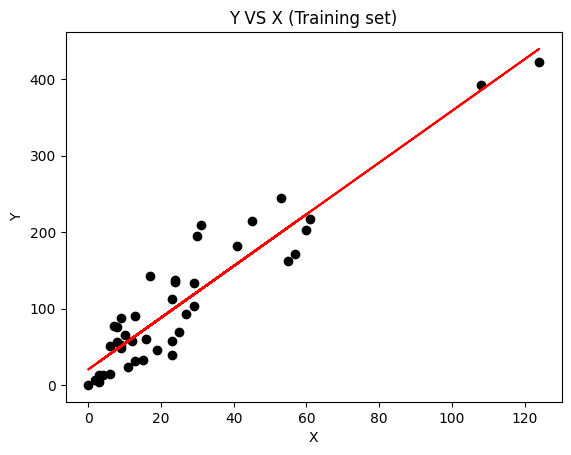

In [ ]:
train = plt
train.scatter(x_train, y_train, color='black')
train.plot(x_train, regressor.predict(x_train), color='red')
train.title('Y VS X (Training set)')
train.xlabel('X')
train.ylabel('Y')
train.show()

same way for test data

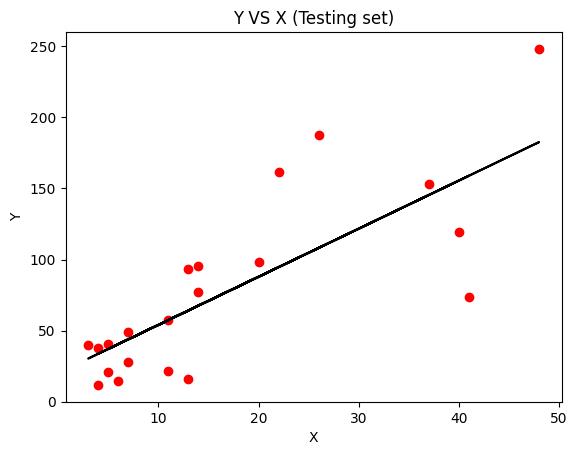

In [ ]:
test = plt
test.scatter(x_test, y_test, color='red')
test.plot(x_test, regressor.predict(x_test), color='black')
test.title('Y VS X (Testing set)')
test.xlabel('X')
test.ylabel('Y')
train.show()

as the model is ready, now one can predict the things



In [ ]:
x=np.array([[5]])
print(x)
y_pred = regressor.predict(x)
y_pred

[[5]]


array([37.09410052])

lets predict for the entire test set and find the error in each

In [ ]:
y_pred = regressor.predict(x_test)
print("Actual values"+ "\t predicted values"+"\t Error")
err=y_test-y_pred
for i in zip(y_test,y_pred,err):
  print(i)


Actual values	 predicted values	 Error
(152.8, 145.3770131044281, 7.42298689557191)
(39.9, 30.326418487278076, 9.573581512721923)
(187.5, 108.15476190476193, 79.34523809523807)
(93.0, 64.1648286687928, 28.835171331207206)
(14.6, 40.47794154173249, -25.87794154173249)
(161.5, 94.61939783215604, 66.88060216784396)
(38.1, 33.71025950542955, 4.389740494570454)
(21.3, 57.39714663248985, -36.09714663248985)
(248.1, 182.5992643040943, 65.50073569590569)
(15.7, 64.1648286687928, -48.46482866879279)
(11.8, 33.71025950542955, -21.910259505429547)
(95.5, 67.54866968694427, 27.951330313055735)
(119.4, 155.52853615888253, -36.128536158882525)
(20.9, 37.09410052358102, -16.19410052358102)
(98.1, 87.8517157958531, 10.248284204146898)
(40.3, 37.09410052358102, 3.2058994764189777)
(57.2, 57.39714663248985, -0.1971466324898472)
(73.4, 158.91237717703402, -85.51237717703401)
(27.9, 43.86178255988396, -15.961782559883964)
(77.5, 67.54866968694427, 9.951330313055735)
(48.8, 43.86178255988396, 4.93821744011

In [ ]:
from sklearn import metrics
y_pred = regressor.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean of experience ',np.mean(df.X))

Mean Absolute Error: 28.78986844476994
Mean Squared Error: 1476.799580425978
Root Mean Squared Error: 38.42915013926249
mean of experience  22.904761904761905
